In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
#import blindschleiche_py3 as bs
from scipy import ndimage

from scipy import stats
from scipy.signal import savgol_filter
import octopus as oct

In [2]:
# Import slope for all coherences
coh = np.array([-0.5, -0.375, -0.25, -0.125, 0, 0.125, 0.25, 0.375, 0.5])*2

slope_coh_ctrl = np.load('slope_coh_ctrl_300rep.npy')
slope_coh_feedback_block = np.load('slope_coh_feedback_block_300rep.npy')
slope_coh_LT_ctrl = np.load('slope_coh_LT_ctrl_300rep.npy')
slope_coh_LL_ctrl = np.load('slope_coh_LL_ctrl_300rep.npy')
slope_coh_LV_ctrl = np.load('slope_coh_LV_ctrl_300rep.npy')
slope_coh_LT_block = np.load('slope_coh_LT_block_300rep.npy')
slope_coh_LL_block = np.load('slope_coh_LL_block_300rep.npy')
slope_coh_LV_block = np.load('slope_coh_LV_block_300rep.npy')

In [3]:
# Import VS mV responses for all coherences
VS_mV_ctrl = np.load('VS_mV_ctrl_300rep.npy')
VS_mV_feedback_block = np.load('VS_mV_feedback_block_300rep.npy')
VS_mV_LT_ctrl = np.load('VS_mV_LT_ctrl_300rep.npy')
VS_mV_LL_ctrl = np.load('VS_mV_LL_ctrl_300rep.npy')
VS_mV_LV_ctrl = np.load('VS_mV_LV_ctrl_300rep.npy')
VS_mV_LT_block = np.load('VS_mV_LT_block_300rep.npy')
VS_mV_LL_block = np.load('VS_mV_LL_block_300rep.npy')
VS_mV_LV_block = np.load('VS_mV_LV_block_300rep.npy')

In [4]:
# Import VS conductance changes for all coherences

delta_g_ctrl = np.load('delta_g_ctrl_300rep.npy')
delta_g_feedback_block = np.load('delta_g_feedback_block_300rep.npy')
delta_g_LT_ctrl = np.load('delta_g_LT_ctrl_300rep.npy')
delta_g_LL_ctrl = np.load('delta_g_LL_ctrl_300rep.npy')
delta_g_LV_ctrl = np.load('delta_g_LV_ctrl_300rep.npy')
delta_g_LT_block = np.load('delta_g_LT_block_300rep.npy')
delta_g_LL_block = np.load('delta_g_LL_block_300rep.npy')
delta_g_LV_block = np.load('delta_g_LV_block_300rep.npy')

delta_ge_ctrl = np.load('delta_ge_ctrl_300rep.npy')
delta_ge_feedback_block = np.load('delta_ge_feedback_block_300rep.npy')
delta_ge_LT_ctrl = np.load('delta_ge_LT_ctrl_300rep.npy')
delta_ge_LL_ctrl = np.load('delta_ge_LL_ctrl_300rep.npy')
delta_ge_LV_ctrl = np.load('delta_ge_LV_ctrl_300rep.npy')
delta_ge_LT_block = np.load('delta_ge_LT_block_300rep.npy')
delta_ge_LL_block = np.load('delta_ge_LL_block_300rep.npy')
delta_ge_LV_block = np.load('delta_ge_LV_block_300rep.npy')

delta_gi_ctrl = np.load('delta_gi_ctrl_300rep.npy')
delta_gi_feedback_block = np.load('delta_gi_feedback_block_300rep.npy')
delta_gi_LT_ctrl = np.load('delta_gi_LT_ctrl_300rep.npy')
delta_gi_LL_ctrl = np.load('delta_gi_LL_ctrl_300rep.npy')
delta_gi_LV_ctrl = np.load('delta_gi_LV_ctrl_300rep.npy')
delta_gi_LT_block = np.load('delta_gi_LT_block_300rep.npy')
delta_gi_LL_block = np.load('delta_gi_LL_block_300rep.npy')
delta_gi_LV_block = np.load('delta_gi_LV_block_300rep.npy')

In [5]:
slope_int_ctrl = np.load('slope_int_ctrl.npy')
slope_int_feedback_block = np.load('slope_int_feedback_block.npy')
slope_int_LT_block = np.load('slope_int_LT_block.npy')
slope_int_LL_block = np.load('slope_int_LL_block.npy')
slope_int_LV_block = np.load('slope_int_LV_block.npy')

slope_int_ctrl_PD = np.load('slope_int_ctrl_PD.npy')
slope_int_feedback_block_PD = np.load('slope_int_feedback_block_PD.npy')
slope_int_LT_block_PD = np.load('slope_int_LT_block_PD.npy')
slope_int_LL_block_PD = np.load('slope_int_LL_block_PD.npy')
slope_int_LV_block_PD = np.load('slope_int_LV_block_PD.npy')

slope_int_ctrl_ND = np.load('slope_int_ctrl_ND.npy')
slope_int_feedback_block_ND = np.load('slope_int_feedback_block_ND.npy')
slope_int_LT_block_ND = np.load('slope_int_LT_block_ND.npy')
slope_int_LL_block_ND = np.load('slope_int_LL_block_ND.npy')
slope_int_LV_block_ND = np.load('slope_int_LV_block_ND.npy')

In [6]:
# Calculate motion opponent suppression indices
MOSI_ctrl = (VS_mV_ctrl[8,:] - VS_mV_ctrl[4,:]) / VS_mV_ctrl[8,:]
MOSI_feedback_block = (VS_mV_feedback_block[8,:] - VS_mV_feedback_block[4,:]) / VS_mV_feedback_block[8,:]
MOSI_LT_block = (VS_mV_LT_block[8,:] - VS_mV_LT_block[4,:]) / VS_mV_LT_block[8,:]
MOSI_LL_block = (VS_mV_LL_block[8,:] - VS_mV_LL_block[4,:]) / VS_mV_LL_block[8,:]
MOSI_LV_block = (VS_mV_LV_block[8,:] - VS_mV_LV_block[4,:]) / VS_mV_LV_block[8,:]

In [7]:
# Calculate motion opponent suppression indices for global TM
MOSI_glob_ctrl = (VS_mV_ctrl[8,:] - VS_mV_ctrl[9,:]) / VS_mV_ctrl[8,:]
MOSI_glob_feedback_block = (VS_mV_feedback_block[8,:] - VS_mV_feedback_block[9,:]) / VS_mV_feedback_block[8,:]
MOSI_glob_LT_block = (VS_mV_LT_block[8,:] - VS_mV_LT_block[9,:]) / VS_mV_LT_block[8,:]
MOSI_glob_LL_block = (VS_mV_LL_block[8,:] - VS_mV_LL_block[9,:]) / VS_mV_LL_block[8,:]
MOSI_glob_LV_block = (VS_mV_LV_block[8,:] - VS_mV_LV_block[9,:]) / VS_mV_LV_block[8,:]

In [8]:
slope_LTsumLLblock = slope_int_LT_block + slope_int_LL_block - slope_int_ctrl

In [9]:
slope_coh_ctrl = np.zeros([9,300])
for i in range(len(VS_mV_ctrl[0,:])):
    slope, intercept, r_value, p_value, std_err = stats.linregress(coh[0:2], VS_mV_ctrl[0:2,i])
    slope_coh_ctrl[0,i] = slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(coh[7:9], VS_mV_ctrl[7:9,i])
    slope_coh_ctrl[8,i] = slope   
    for j in [1,2,3,4,5,6,7]:   
        slope, intercept, r_value, p_value, std_err = stats.linregress(coh[j-1:j+2], VS_mV_ctrl[j-1:j+2,i])
        slope_coh_ctrl[j,i] = slope       

In [10]:
np.mean(slope_coh_ctrl,1)

array([12.07854737, 12.08397343, 11.67246063, 10.61328156,  9.6578325 ,
        9.35114149,  9.49109926,  9.3436325 ,  9.06272582])

In [11]:
slope_coh_feedback_block = np.zeros([9,300])
for i in range(len(VS_mV_feedback_block[0,:])):
    slope, intercept, r_value, p_value, std_err = stats.linregress(coh[0:2], VS_mV_feedback_block[0:2,i])
    slope_coh_feedback_block[0,i] = slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(coh[7:9], VS_mV_feedback_block[7:9,i])
    slope_coh_feedback_block[8,i] = slope   
    for j in [1,2,3,4,5,6,7]:   
        slope, intercept, r_value, p_value, std_err = stats.linregress(coh[j-1:j+2], VS_mV_feedback_block[j-1:j+2,i])
        slope_coh_feedback_block[j,i] = slope   

In [12]:
slope_coh_feedback_block[:,0]

array([ 9.85579056,  8.83555531,  9.30029234,  6.2070023 ,  4.06816263,
        5.94143182,  5.21381888,  7.86416476, 10.67597012])

In [19]:
fw = 0.4

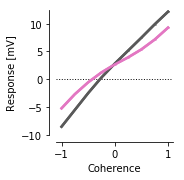

In [13]:
fig = plt.figure(figsize = (2.1, 2.3))

ax = fig.add_subplot(111) #PLOT coherence tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(VS_mV_ctrl,1)[0:9], linewidth = 2.5, color = '0.35')
plt.errorbar(coh, np.mean(VS_mV_ctrl,1)[0:9], yerr = stats.sem(VS_mV_ctrl,1)[0:9],
             linewidth = 2.5, color = '0.35')

plt.plot(coh, np.mean(VS_mV_feedback_block,1)[0:9], linewidth = 2.5, color = 'C6')
plt.errorbar(coh, np.mean(VS_mV_feedback_block,1)[0:9], yerr = stats.sem(VS_mV_feedback_block,1)[0:9],
             linewidth = 2.5, color = 'C6')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel('Response [mV]', fontsize = 10)
plt.ylim([-10,12.5])


#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
#FigS7_Coherence_tuning_VS_feedback_block_mV_300rep.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

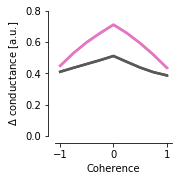

In [141]:
fig = plt.figure(figsize = (2.1, 2.3))

ax = fig.add_subplot(111) #PLOT coherence tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(delta_g_ctrl,1)[0:9], linewidth = 2.5, color = '0.35')
plt.errorbar(coh, np.mean(delta_g_ctrl,1)[0:9], yerr = stats.sem(delta_g_ctrl,1)[0:9],
            linewidth = 2.5, color = '0.35')

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(delta_g_feedback_block,1)[0:9], linewidth = 2.5, color = 'C6')
plt.errorbar(coh, np.mean(delta_g_feedback_block,1)[0:9], yerr = stats.sem(delta_g_feedback_block,1)[0:9],
            linewidth = 2.5, color = 'C6')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel(r'$\Delta$' + ' conductance [a.u.]', fontsize = 10)
plt.ylim([0,0.8])

#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
#FigS7_Coherence_tuning_VS_feedback_block_only_total_300rep.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

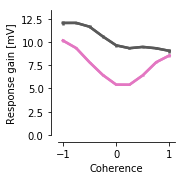

In [133]:
fig = plt.figure(figsize = (2.1, 2.3))

ax = fig.add_subplot(111) #PLOT slopes of coherence tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(slope_coh_ctrl,1), linewidth = 2.5, color = '0.35')
plt.errorbar(coh, np.mean(slope_coh_ctrl,1), yerr = stats.sem(slope_coh_ctrl,1),
             linewidth = 2.5, color = '0.35')

plt.plot(coh, np.mean(slope_coh_feedback_block,1), linewidth = 2.5, color = 'C6')
plt.errorbar(coh, np.mean(slope_coh_feedback_block,1), yerr = stats.sem(slope_coh_feedback_block,1),
             linewidth = 2.5, color = 'C6')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel('Response gain [mV]', fontsize = 10)
#xticks = np.array([-0.5, -0.25, 0, 0.25, 0.5])
#ax.set_xticklabels([-0.5, -0.25, 0, 0.25, 0.5], size=10)
plt.ylim([0,13.5])
#ax.set_xticks(xticks)
#ax.set_yticks([-5, 0, 5])
#ax.set_yticklabels([-5, 0, 5], size=10)

plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
FigS8_Coherence_tuning_VS_ctrl_block_gain.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

In [14]:
slope_coh_ctrl_min_block = slope_coh_ctrl - slope_coh_feedback_block

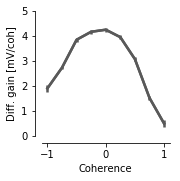

In [16]:
fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT slopes of coherence tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(slope_coh_ctrl_min_block,1), linewidth = 2.5, color = '0.35')
plt.errorbar(coh, np.mean(slope_coh_ctrl_min_block,1), yerr = stats.sem(slope_coh_ctrl_min_block,1),
             linewidth = 2.5, color = '0.35')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel('Diff. gain [mV/coh]', fontsize = 10)
plt.ylim([0,5])

#ax.set_xticks(xticks)
#ax.set_yticks([-5, 0, 5])
#ax.set_yticklabels([-5, 0, 5], size=10)

#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#FigS7_Coherence_tuning_VS_LL_block_mV.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

In [15]:
delta_ge_ctrl_min_block = delta_ge_ctrl - delta_ge_feedback_block
delta_gi_ctrl_min_block = delta_gi_ctrl - delta_gi_feedback_block
delta_g_ctrl_min_block = delta_g_ctrl - delta_g_feedback_block

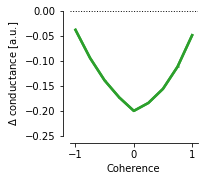

In [18]:
fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT coherence tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(delta_g_ctrl_min_block,1)[0:9], linewidth = 2.5, color = 'C2')
plt.errorbar(coh, np.mean(delta_g_ctrl_min_block,1)[0:9], yerr = stats.sem(delta_g_ctrl_min_block,1)[0:9],
        linewidth = 2.5, color = 'C2')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel(r'$\Delta$' + ' conductance [a.u.]', fontsize = 10)
plt.ylim([-0.25,0])

#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
#FigS7_Coherence_tuning_VS_LV_block_minus_ctrl_only_total_300rep.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

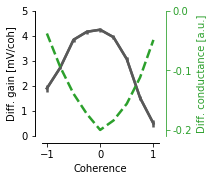

In [19]:
fig = plt.figure(figsize = (2.1, 2.3))

ax = fig.add_subplot(111) #PLOT slopes of coherence tuning

#ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(slope_coh_ctrl_min_block,1), linewidth = 2.5, color = '0.35')
plt.errorbar(coh, np.mean(slope_coh_ctrl_min_block,1), yerr = stats.sem(slope_coh_ctrl_min_block,1),
             linewidth = 2.5, color = '0.35')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel('Diff. gain [mV/coh]', fontsize = 10)
plt.ylim([0,5])
#ax.set_xticks([-1, -0.5, 0, 0.5, 1])
#ax.set_xticklabels([-1, -0.5, 0, 0.5, 1], size=10)

ax2 = ax.twinx()
ax2.plot(coh, np.mean(delta_g_ctrl_min_block,1)[0:9], linewidth = 2.5, linestyle='--', color = 'C2')
#ax2.errorbar(coh, np.mean(delta_g_ctrl_min_block,1)[0:9], yerr = stats.sem(delta_g_ctrl_min_block,1)[0:9],
#        linewidth = 2.5, color = 'C2')

ax2.tick_params(axis='y', colors='C2')
ax2.spines['right'].set_color('C2')
ax2.spines["top"].set_visible(False)
ax2.spines['left'].set_position(('outward', 7))
ax2.spines['bottom'].set_position(('outward', 7))
ax2.spines['right'].set_position(('outward', 7))
ax2.set_ylim([-0.21, 0])
ax2.set_yticks([-0.2, -0.1, 0.0])
ax2.set_yticklabels([-0.2, -0.1, 0.0], size=10)
ax2.set_ylabel('Diff. conductance [a.u.]', fontsize = 10, color = 'C2')

#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
#FigS7_Diff_Gain_tuning_VS_feedback_block_300rep.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

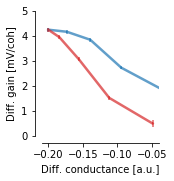

In [20]:
fig = plt.figure(figsize = (2.1, 2.3))

ax = fig.add_subplot(111) #PLOT slopes of coherence tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

plt.plot(np.mean(delta_g_ctrl_min_block,1)[0:5], np.mean(slope_coh_ctrl_min_block[0:5],1), linewidth=2.5, color='C0', alpha=0.7)
plt.errorbar(np.mean(delta_g_ctrl_min_block,1)[0:5], np.mean(slope_coh_ctrl_min_block[0:5],1), 
             xerr = stats.sem(delta_g_ctrl_min_block,1)[0:5],
             yerr = stats.sem(slope_coh_ctrl_min_block,1)[0:5], fmt='none', color = 'C0', alpha=0.7)

plt.plot(np.mean(delta_g_ctrl_min_block,1)[4:9], np.mean(slope_coh_ctrl_min_block[4:9],1), linewidth=2.5, color='C3', alpha=0.7)
plt.errorbar(np.mean(delta_g_ctrl_min_block,1)[4:9], np.mean(slope_coh_ctrl_min_block[4:9],1), 
             xerr = stats.sem(delta_g_ctrl_min_block,1)[4:9],
             yerr = stats.sem(slope_coh_ctrl_min_block,1)[4:9], fmt='none', color = 'C3', alpha=0.7)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))

ax.set_xlabel('Diff. conductance [a.u.]', fontsize = 10)
ax.set_ylabel('Diff. gain [mV/coh]', fontsize = 10)
plt.ylim([0,5])
plt.xlim([-0.21,-0.04])
ax.set_xticks([-0.2, -0.15, -0.1, -0.05])
#ax.set_yticklabels([-5, 0, 5], size=10)

#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
#FigS7_Gain_vs_conductance_tuning_VS_feedback_block_300rep.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

In [25]:
stats.pearsonr(np.mean(delta_g_ctrl_min_block,1)[0:5], np.mean(slope_coh_ctrl_min_block[0:5],1))

(-0.9787791435219251, 0.003699056467477023)

In [27]:
stats.linregress(np.mean(delta_g_ctrl_min_block,1)[0:5], np.mean(slope_coh_ctrl_min_block[0:5],1))

LinregressResult(slope=-15.565925804820125, intercept=1.3637289070446577, rvalue=-0.9787791435219253, pvalue=0.003699056467476963, stderr=1.8815238957486269)

In [26]:
stats.pearsonr(np.mean(delta_g_ctrl_min_block,1)[4:9], np.mean(slope_coh_ctrl_min_block[4:9],1))

(-0.9889516610453779, 0.001391740601458019)

In [29]:
stats.linregress(np.mean(delta_g_ctrl_min_block,1)[4:9], np.mean(slope_coh_ctrl_min_block[4:9],1))

LinregressResult(slope=-26.01448414745178, intercept=-0.9963915810861312, rvalue=-0.9889516610453781, pvalue=0.0013917406014579768, stderr=2.251335066089426)

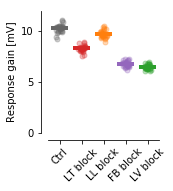

In [21]:
# Make Scatter Plot Gain (slope)

pos = [0, 1, 2, 3, 4]
fw = 0.4
fig = plt.figure(figsize = (fw*len(pos), 2.25))
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [slope_int_ctrl[0,:], slope_int_LT_block[0,:], slope_int_LL_block [0,:],
        slope_int_feedback_block[0,:], slope_int_LV_block[0,:]]
colors = ['0.4', 'C3', 'C1', 'C4', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.3, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','LT block', 'LL block', 'FB block', 'LV block'), rotation=45, size=10)
ax.set_ylabel('Response gain [mV]', size=10)
yticks = np.array([0, 5, 10])
ax.set_yticklabels([0, 5, 10], size=10)
ax.set_yticks(yticks)
plt.ylim([0, 12])
#plt.title('Gain', size=10)
    
bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig7_Conductance_global_model_ctrl_block_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

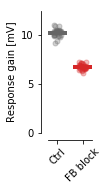

In [22]:
# Make Scatter Plot Gain (slope)

pos = [0, 1]
fw = 0.4
fig = plt.figure(figsize = (fw*len(pos), 2.25))
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [slope_int_ctrl[0,:], slope_int_feedback_block[0,:]]
colors = ['0.4', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.3, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','FB block', 'LL block', 'FB block', 'LV block'), rotation=45, size=10)
ax.set_ylabel('Response gain [mV]', size=10)
yticks = np.array([0, 5, 10])
ax.set_yticklabels([0, 5, 10], size=10)
ax.set_yticks(yticks)
plt.ylim([0, 12.5])
#plt.title('Gain', size=10)
    
bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#FigRX_Response_gain_model_fb_block.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [23]:
stats.ttest_rel(slope_int_ctrl[0,:], slope_int_LL_block[0,:])

Ttest_relResult(statistic=6.087118395660161, pvalue=1.2545169391346318e-06)

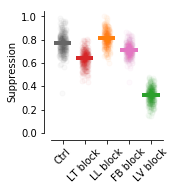

In [121]:
# Make Scatter MOSI (Motion Opponent Suppression)

pos = [0, 1, 2, 3, 4]
fw = 0.4
fig = plt.figure(figsize = (fw*len(pos), 2.25))
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [MOSI_ctrl, MOSI_LT_block, MOSI_LL_block, MOSI_feedback_block, MOSI_LV_block]
colors = ['0.4', 'C3', 'C1', 'C6', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.03, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','LT block', 'LL block', 'FB block', 'LV block'), rotation=45, size=10)
ax.set_ylabel('Suppression', size=10)
#yticks = np.array([0, 5, 10, 15])
#ax.set_yticklabels([0, 5, 10, 15], size=10)
#ax.set_yticks(yticks)
plt.ylim([0, 1.05])
#plt.title('Gain', size=10)
    
bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
FigS7_MOSI_local_ctrl_block_scatter.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [25]:
stats.ttest_rel(MOSI_ctrl, MOSI_feedback_block)

Ttest_relResult(statistic=26.854249532878274, pvalue=1.1375963595758143e-81)

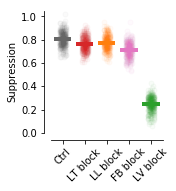

In [122]:
# Make Scatter MOSI_glob (Motion Opponent Suppression)

pos = [0, 1, 2, 3, 4]
fw = 0.4
fig = plt.figure(figsize = (fw*len(pos), 2.25))
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [MOSI_glob_ctrl, MOSI_glob_LT_block, MOSI_glob_LL_block, MOSI_glob_feedback_block, MOSI_glob_LV_block]
colors = ['0.4', 'C3', 'C1', 'C6', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.03, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','LT block', 'LL block', 'FB block', 'LV block'), rotation=45, size=10)
ax.set_ylabel('Suppression', size=10)
#yticks = np.array([0, 5, 10, 15])
#ax.set_yticklabels([0, 5, 10, 15], size=10)
#ax.set_yticks(yticks)
plt.ylim([0, 1.05])
#plt.title('Gain', size=10)
    
bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
FigS7_MOSI_global_ctrl_block_scatter.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [34]:
stats.ttest_rel(MOSI_glob_ctrl, MOSI_glob_LV_block)

Ttest_relResult(statistic=116.67321744030016, pvalue=2.219276526721781e-251)

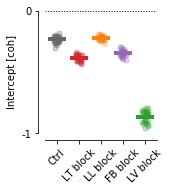

In [27]:
# Make Scatter Plot zero-crossing (x-intercept)

pos = [0, 1, 2, 3, 4]
fw = 0.4
fig = plt.figure(figsize = (fw*len(pos), 2.25))
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [slope_int_ctrl[1,:], slope_int_LT_block[1,:], slope_int_LL_block [1,:],
        slope_int_feedback_block[1,:], slope_int_LV_block[1,:]]
colors = ['0.4', 'C3', 'C1', 'C4', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.3, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','LT block', 'LL block', 'FB block', 'LV block'), rotation=45, size=10)
ax.set_ylabel('Intercept [coh]', size=10)
yticks = np.array([-1, 0, 1])
ax.set_yticklabels([-1, 0, 1], size=10)
ax.set_yticks(yticks)
plt.ylim([-1, 0])
#plt.title('Gain', size=10)
    
bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig7_Conductance_global_model_ctrl_block_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

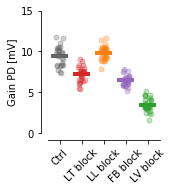

In [28]:
# Make Scatter Plot Gain (slope)

pos = [0, 1, 2, 3, 4]
fw = 0.4
fig = plt.figure(figsize = (fw*len(pos), 2.25))
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [slope_int_ctrl_PD[0,:], slope_int_LT_block_PD[0,:], slope_int_LL_block_PD[0,:],
        slope_int_feedback_block_PD[0,:], slope_int_LV_block_PD[0,:]]
colors = ['0.4', 'C3', 'C1', 'C4', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.3, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','LT block', 'LL block', 'FB block', 'LV block'), rotation=45, size=10)
ax.set_ylabel('Gain PD [mV]', size=10)
yticks = np.array([0, 5, 10, 15])
ax.set_yticklabels([0, 5, 10, 15], size=10)
ax.set_yticks(yticks)
plt.ylim([0, 15])
#plt.title('Gain', size=10)
    
bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig7_Conductance_global_model_ctrl_block_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

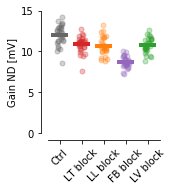

In [29]:
# Make Scatter Plot Gain (slope)

pos = [0, 1, 2, 3, 4]
fw = 0.4
fig = plt.figure(figsize = (fw*len(pos), 2.25))
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [slope_int_ctrl_ND[0,:], slope_int_LT_block_ND[0,:], slope_int_LL_block_ND[0,:],
        slope_int_feedback_block_ND[0,:], slope_int_LV_block_ND[0,:]]
colors = ['0.4', 'C3', 'C1', 'C4', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.3, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','LT block', 'LL block', 'FB block', 'LV block'), rotation=45, size=10)
ax.set_ylabel('Gain ND [mV]', size=10)
yticks = np.array([0, 5, 10, 15])
ax.set_yticklabels([0, 5, 10, 15], size=10)
ax.set_yticks(yticks)
plt.ylim([0, 15])
#plt.title('Gain', size=10)
    
bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig7_Conductance_global_model_ctrl_block_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

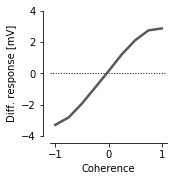

In [135]:
coh = np.array([-0.5, -0.375, -0.25, -0.125, 0, 0.125, 0.25, 0.375, 0.5])*2

fig = plt.figure(figsize = (2.1, 2.3))

ax = fig.add_subplot(111) #PLOT coherence tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(VS_mV_ctrl,1)[0:9] - np.mean(VS_mV_feedback_block,1)[0:9], linewidth = 2.5, color = '0.35')
#plt.plot(coh, 2*np.mean(VS_mV_ctrl,1)[0:9] - np.mean(VS_mV_LT_block,1)[0:9] - np.mean(VS_mV_LL_block,1)[0:9],
#         linewidth = 2.5, color = 'C8')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel('Diff. response [mV]', fontsize = 10)
#xticks = np.array([-0.5, -0.25, 0, 0.25, 0.5])
#ax.set_xticklabels([-0.5, -0.25, 0, 0.25, 0.5], size=10)
plt.ylim([-4,4])
#ax.set_xticks(xticks)
#ax.set_yticks([-5, 0, 5])
#ax.set_yticklabels([-5, 0, 5], size=10)

#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\Modelling\\\
#FigS8_Coherence_tuning_VS_ctrl_min_block_mV.pdf',bbox_inches='tight', dpi=600, transparent=True)

bbox_inches = 'tight'
plt.show()

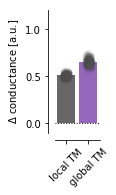

In [97]:
# Make Scatter Plot of Ephys conductance (TM vs. Split)

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [delta_g_ctrl[4], delta_g_ctrl[9]]
colors = ['0.4', 'C4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.05, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('local TM','global TM'), rotation=45, size=10)
ax.set_ylabel(r'$\Delta$'+ ' conductance [a.u.]', size=10)
yticks = np.array([0, 0.5, 1, 1.5, 2])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5, 2], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.1, 1.2])

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
Fig7_Conductance_local_global_model_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [16]:
stats.ttest_rel(delta_g_ctrl[4], delta_g_ctrl[9])

Ttest_relResult(statistic=-60.415835843653966, pvalue=1.310787710150531e-169)

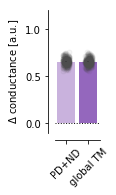

In [98]:
# Make Scatter Plot of modelling conductance (Split global: PD+ND vs. Split)

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [delta_g_ctrl[9], delta_g_ctrl[9]]
colors = ['C4', 'C4']
alphas = ([0.5, 1])

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), color=colors[j], alpha=alphas[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.05, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD+ND','global TM'), rotation=45, size=10)
ax.set_ylabel(r'$\Delta$'+ ' conductance [a.u.]', size=10)
yticks = np.array([0, 0.5, 1, 1.5, 2])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.1,1.2])

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
Fig7_Conductance_Split_PDND_model_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

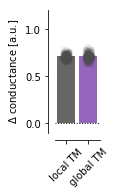

In [99]:
# Make Scatter Plot of modelling conductance (Split global: PD+ND vs. Split)

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [delta_g_feedback_block[4], delta_g_feedback_block[9]]

colors = ['0.4', 'C4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.05, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('local TM','global TM'), rotation=45, size=10)
ax.set_ylabel(r'$\Delta$'+ ' conductance [a.u.]', size=10)
yticks = np.array([0, 0.5, 1, 1.5, 2])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.1, 1.2])
#plt.title('Feedback block')

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
Fig7_Conductance_model_barplot_comp_ctrl_block.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [17]:
stats.ttest_rel(delta_g_feedback_block[4], delta_g_feedback_block[9])

Ttest_relResult(statistic=0.617147352187203, pvalue=0.5376072081657177)

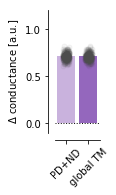

In [100]:
# Make Scatter Plot of modelling conductance (Split global: PD+ND vs. Split)

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [delta_g_feedback_block[9], delta_g_feedback_block[9]]

colors = ['C4', 'C4']
alphas = ([0.5, 1])

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), color=colors[j], alpha=alphas[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.05, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD+ND','global TM'), rotation=45, size=10)
ax.set_ylabel(r'$\Delta$'+ ' conductance [a.u.]', size=10)
yticks = np.array([0, 0.5, 1, 1.5, 2])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.1,1.2])
#plt.title('Feedback block')

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
Fig7_Conductance_model_Split_PDND_model_block_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

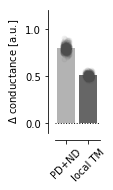

In [22]:
# Make Scatter Plot of modelling conductance (TM local: PD+ND vs. TM)

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [delta_g_ctrl[0] + delta_g_ctrl[8], delta_g_ctrl[4]]
colors = ['0.7', '0.4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.05, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD+ND','local TM'), rotation=45, size=10)
ax.set_ylabel(r'$\Delta$'+ ' conductance [a.u.]', size=10)
yticks = np.array([0, 0.5, 1, 1.5, 2])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.1, 1.2])

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
Fig7_Conductance_TM_PDND_model_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [21]:
stats.ttest_rel(delta_g_ctrl[0] + delta_g_ctrl[8], delta_g_ctrl[4])

Ttest_relResult(statistic=117.00934359047282, pvalue=9.563787391582376e-252)

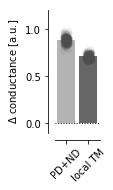

In [23]:
# Make Scatter Plot of modelling conductance (Split global: PD+ND vs. Split)

pos = [0,1]

fig = plt.figure(figsize = (fw*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [delta_g_feedback_block[0] + delta_g_feedback_block[8], delta_g_feedback_block[4]]

colors = ['0.7', '0.4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.05, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('PD+ND','local TM'), rotation=45, size=10)
ax.set_ylabel(r'$\Delta$'+ ' conductance [a.u.]', size=10)
yticks = np.array([0, 0.5, 1, 1.5, 2])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.1, 1.2])
#plt.title('Feedback block')

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
Fig7_Conductance_model_TM_PDND_model_block_barplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [24]:
stats.ttest_rel(delta_g_feedback_block[0] + delta_g_feedback_block[8], delta_g_feedback_block[4])

Ttest_relResult(statistic=63.1312819035642, pvalue=6.640823013510619e-175)